In [22]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3,suppress=True)

In [93]:
def f(x,height,pos,std):
    y = height*np.exp(-(x-pos)**2/(2*std))
    y[y>255]=255
    return y
    
x = np.arange(10)
y = 1.0*(523*np.exp(-(x-4.4)**2/(2*0.25))+np.random.randn(10)*2).astype(int)
y[y>255]=255
p0 = np.array([2,3,2])
popt, pcov = curve_fit(f,x,y,p0)

In [94]:
popt

array([713.575,   4.339,   0.21 ])

In [95]:
1.96*np.sqrt(np.diag(pcov))

array([442.075,   0.101,   0.062])

In [96]:
1.96*np.sqrt(pcov[0,0])

442.07470809575125

In [97]:
1.96*np.sqrt(pcov[1,1])

0.10084039266727224

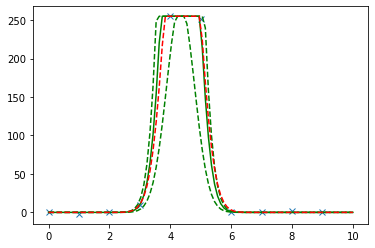

In [100]:
plt.plot(x,y,'x')
testx = np.linspace(0,10,100)
testy = f(testx,popt[0],popt[1],popt[2])
plt.plot(testx,testy,'g-')
testy = f(testx,popt[0]+1.96*np.sqrt(pcov[0,0]),popt[1],popt[2])
plt.plot(testx,testy,'--g')
testy = f(testx,popt[0]-1.96*np.sqrt(pcov[0,0]),popt[1],popt[2])
plt.plot(testx,testy,'--g')
testx = np.linspace(0,10,100)
testy = f(testx,523,4.4,0.25)
plt.plot(testx,testy,'r--')

In [101]:
popt

array([713.575,   4.339,   0.21 ])

In [104]:
1.96*np.sqrt(pcov[0,0])

442.07470809575125

- is the PSF really Gaussian
- are the values in the image really linear
- how to handle ceiling effect (saturation)
- also pixels are integrals
- also image is 2d!
- need to try on real data.
- maybe need to look at how sensors work re RGB location of sensors - what does this mean for the predictions?
